# Search and Rank

# Alice

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stringProcess as sp
from collections import defaultdict

In [28]:
#read document
doc1 = "alice.txt"
doc2 = "alice_cooper.txt"
doc3 = "alice_springs.txt"
docs = [doc1, doc2, doc3]
word_dict={}

with open(doc1, 'r') as f:
    for line in f:
        new_dict = sp.get_word_counts(line, True, False) #minimal stemming, not removing stopwords
        for k,v in new_dict.items():
            try: 
                word_dict[k] = word_dict[k]+ new_dict[k]
            except:
                word_dict[k] = new_dict[k]

In [29]:
i = 0
words = []
counts = []
for key, value in sorted(word_dict.items(), reverse=True, key=lambda item: \
                         (item[1], item[0])):
    i +=1
    if i < 10:
        print ("%s: %s" % (key, value))
    words.append(key)
    counts.append(value)

the: 1644
and: 872
to: 729
a: 632
it: 595
she: 553
i: 545
of: 515
said: 462


# Zipf's Law

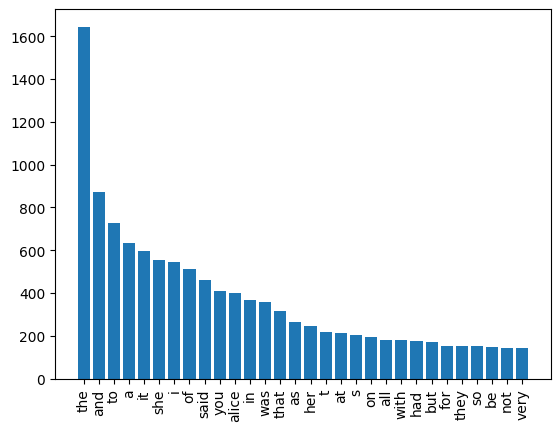

In [30]:
plt.bar(words[:30], counts[:30])
plt.xticks(rotation='vertical');

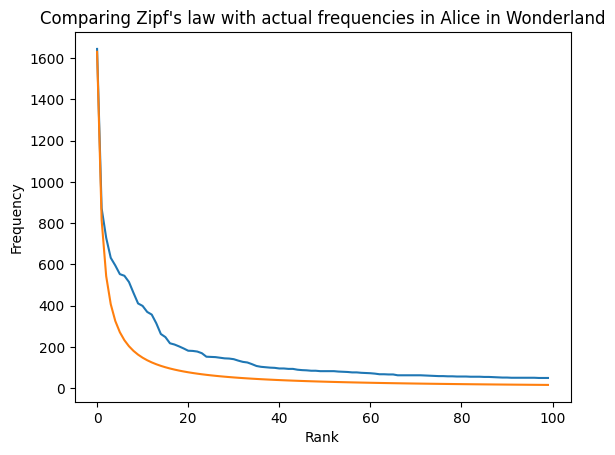

In [31]:
plt.plot(range(100), counts[:100])
#to compare with inverse law
x = range(100)
y = 1630/(np.array(x)+1)
plt.plot(x, y);
plt.xlabel("Rank");
plt.ylabel("Frequency");
plt.title("Comparing Zipf's law with actual frequencies in Alice in Wonderland");

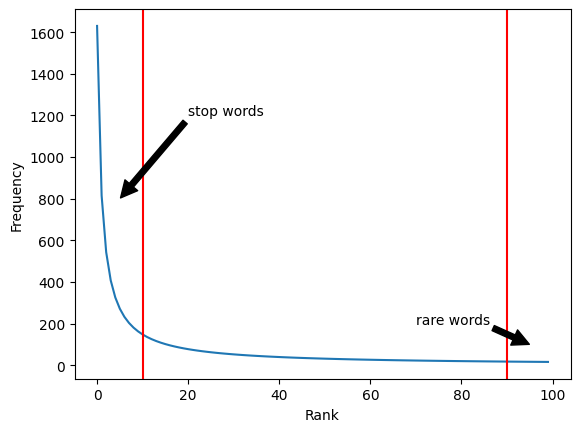

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y);
plt.xlabel("Rank");
plt.ylabel("Frequency");
plt.axvline(x= 10, color = 'r');
plt.axvline(x= 90, color = 'r');
ax.annotate('stop words', xy=(5, 800), xytext=(20,1200), arrowprops=dict(facecolor='black', shrink=0.01));
ax.annotate('rare words', xy=(95, 100), xytext=(70,200), arrowprops=dict(facecolor='black', shrink=0.01));


# Vector Space Model

In [33]:
def normalise(vec):
    tot = sum(vec)
    return vec/tot
from mpl_toolkits.mplot3d import Axes3D

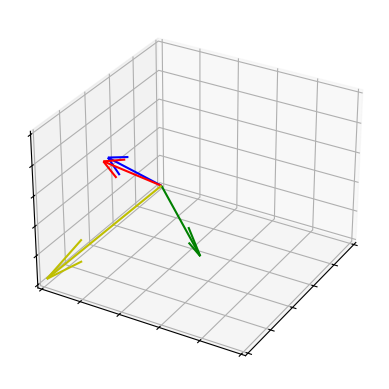

In [34]:
dict1 = {"alice":245, "cooper":0, "springs":5} #doc vector on alice in wonderland
dict2 = {"alice":100, "cooper":102, "springs":5} #doc vector on alice cooper article
dict3 = {"alice":50, "cooper":1, "springs":54} #doct vector on alice springs in australia
q1 = {"alice":1, "cooper":0, "springs":1}

lst = [dict1, dict2, dict3, q1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.tick_params(labelbottom=False, labelright=False, labelleft=False) 
cols = ['y', 'g', 'b', 'r']
for i in range(len(lst)):
    vec = np.array(list(lst[i].values()))
    vec = normalise(vec)
    ax.quiver(0,0, 0, vec[0], vec[1], vec[2], color=cols[i])
ax.view_init(azim=30)
ax.grid(linewidth=20)

In [35]:
word_dict={}
#get vocabulary for three docs
for doc in docs:
    with open(doc, 'r') as f:
        for line in f:
            new_dict = sp.get_word_counts(line, False, True) #full stemming, removing stopwords
            for k,v in new_dict.items():
                try: 
                    word_dict[k] = word_dict[k]+ new_dict[k]
                except:
                    word_dict[k] = new_dict[k]
i = 0
words = []
counts = []
for key, value in sorted(word_dict.items(), reverse=True, key=lambda item: \
                         (item[1], item[0])):
    i +=1
    if i < 10:
        print ("%s: %s" % (key, value))
    if i < 256:
        words.append(key)
        counts.append(value)
    else:
        break

alic: 838
said: 473
cooper: 398
spring: 220
not: 171
retriev: 158
littl: 135
one: 131
time: 120


# Inverted Index

In [36]:
#calculate modulus of vector
def magnitude(vect):
    return np.sqrt(sum((vect)**2))

Precalculate magnitude at same time as working out inverted index

In [37]:
word_dict_final={}
inverted_index=defaultdict(list)
#get vocabulary for three docs
precalc_mods = []
for i in range(len(docs)):
    for word in words:
        word_dict_final[word] = 0 #make empty dict with vocab as keys for vector for each doc
    with open(docs[i], 'r') as f:
        for line in f:
            new_dict = sp.get_word_counts(line, False, True) #full stemming, removing stopwords
            for k,v in new_dict.items():
                try: 
                    word_dict_final[k] = word_dict_final[k]+ new_dict[k]
                except:
                    pass #only collect words in the dictionary, 256 most popular between the three docs
        precalc_mods.append(magnitude(np.array(list(word_dict_final.values())))) #collect precalculated mods in a list
    for word in words:
        inverted_index[word].append((i,word_dict_final[word]))
print(sorted(inverted_index.items()))

[('aborigin', [(0, 0), (1, 0), (2, 47)]), ('ad', [(0, 24), (1, 3), (2, 0)]), ('air', [(0, 16), (1, 3), (2, 6)]), ('album', [(0, 0), (1, 88), (2, 4)]), ('alic', [(0, 399), (1, 207), (2, 232)]), ('also', [(0, 2), (1, 35), (2, 24)]), ('american', [(0, 0), (1, 9), (2, 13)]), ('anoth', [(0, 22), (1, 11), (2, 1)]), ('appear', [(0, 12), (1, 22), (2, 1)]), ('april', [(0, 0), (1, 41), (2, 5)]), ('archiv', [(0, 0), (1, 39), (2, 35)]), ('arm', [(0, 21), (1, 0), (2, 0)]), ('ask', [(0, 33), (1, 5), (2, 0)]), ('august', [(0, 0), (1, 45), (2, 24)]), ('australia', [(0, 1), (1, 1), (2, 68)]), ('australian', [(0, 0), (1, 1), (2, 63)]), ('award', [(0, 0), (1, 34), (2, 0)]), ('away', [(0, 25), (1, 7), (2, 0)]), ('babi', [(0, 14), (1, 14), (2, 0)]), ('back', [(0, 40), (1, 11), (2, 4)]), ('band', [(0, 0), (1, 89), (2, 1)]), ('began', [(0, 58), (1, 6), (2, 3)]), ('begin', [(0, 31), (1, 2), (2, 0)]), ('best', [(0, 12), (1, 10), (2, 0)]), ('book', [(0, 13), (1, 9), (2, 2)]), ('call', [(0, 25), (1, 10), (2, 7)]

# Calculating Cosine Similarity

In [38]:
def cos_sim(docID, query, precalc_mods, inverted_index):
    sum = 0
    size_q = magnitude(np.array(list(query.values())))
    for term, freq in query.items(): # assumes query term is in index
        sum+= freq*inverted_index[term][docID][1]
    return sum/(precalc_mods[docID]*size_q)

In [39]:
query = {"alic":1, "spring":1} 

#cosine similarity of doc 0 and query
cos_sim0 = cos_sim(0, query, precalc_mods, inverted_index)
print("similarity to document 0:", cos_sim0)

#cosine similarity of doc 1 and query
cos_sim1 = cos_sim(1, query, precalc_mods, inverted_index)
print("similarity to document 1:", cos_sim1)

#cosine similarity of doc 2 and query
cos_sim2 = cos_sim(2, query, precalc_mods, inverted_index)
print("similarity to document 2:", cos_sim2)

similarity to document 0: 0.3447437085775705
similarity to document 1: 0.2723876827245191
similarity to document 2: 0.854562524691747


In [40]:
query = {"alic":1, "cooper":1} 

#cosine similarity of doc 0 and query
cos_sim0 = cos_sim(0, query, precalc_mods, inverted_index)
print("similarity to document 0:", cos_sim0)

#cosine similarity of doc 1 and query
cos_sim1 = cos_sim(1, query, precalc_mods, inverted_index)
print("similarity to document 1:", cos_sim1)

#cosine similarity of doc 2 and query
cos_sim2 = cos_sim(2, query, precalc_mods, inverted_index)
print("similarity to document 2:", cos_sim2)

similarity to document 0: 0.3447437085775705
similarity to document 1: 0.7884906605183447
similarity to document 2: 0.44057445717441174


In [41]:
query = {"alic":1, "rabbit":1} 

#cosine similarity of doc 0 and query
cos_sim0 = cos_sim(0, query, precalc_mods, inverted_index)
print("similarity to document 0:", cos_sim0)

#cosine similarity of doc 1 and query
cos_sim1 = cos_sim(1, query, precalc_mods, inverted_index)
print("similarity to document 1:", cos_sim1)

#cosine similarity of doc 2 and query
cos_sim2 = cos_sim(2, query, precalc_mods, inverted_index)
print("similarity to document 2:", cos_sim2)

similarity to document 0: 0.38967271320422125
similarity to document 1: 0.2697811020285907
similarity to document 2: 0.44057445717441174


# Term Frequency - Inverse Document Frequency


In [42]:
def count_vectoriser(docs):
    df = pd.DataFrame()
    for i in range(len(docs)):
        
        with open(docs[i], 'r') as f:
            word_dict_doc = {}
            for line in f:
                new_dict = sp.get_word_counts(line, False, True) #full stemming, removing stopwords
                for k,v in new_dict.items():
                    try: 
                        word_dict_doc[k] = word_dict_doc[k]+ new_dict[k]
                    except:
                        word_dict_doc[k] = new_dict[k]
            doc_df =pd.DataFrame(word_dict_doc, index=[i])
            df = pd.concat([df,doc_df], sort=True)
    df.fillna(value=0, inplace=True)
    return df        

In [43]:
df = count_vectoriser(docs)
print(df.iloc[0])

aat          0.0
ab           0.0
abad         0.0
abc          0.0
abid         1.0
            ... 
zimbio       0.0
zimmerman    0.0
zipper       0.0
zombi        0.0
zone         0.0
Name: 0, Length: 4183, dtype: float64


In [44]:
def term_frequency(term, df, N):
    f_td = []
    for i in range(N):
        f_td.append(df[term].iloc[i])
    if sum(f_td) ==0:
        return np.zeros(N)
    for i in range(N):
        f_td[i] = f_td[i]/sum(f_td)
    return f_td #gives frequency of term in each document

def inverse_document_frequency(term, df, N):
    idf = []
    for i in range(N):
        n_t = df[term].iloc[i]
        idf.append(np.log(N/(1+n_t)))
    return idf

def get_tf_idf(query, docs):
    N =len(docs)
    query_dict=sp.get_word_counts(query)
    query_representation=query_dict.keys() #assume each term is there only once
    tf_idf = []
    df = count_vectoriser(docs)
    for term in query_representation:
        tf = np.array(term_frequency(term, df, N))
        idf = np.array(inverse_document_frequency(term, df, N))
        tf_idf = abs(tf*idf)
    for i in range(N):
        print("Document", i, "scores", tf_idf[i])

 

In [45]:
query = "Alice Springs"
get_tf_idf(query, docs)  

Document 0 scores 0.0
Document 1 scores 0.0
Document 2 scores 4.290280530367308


In [46]:
query = "Alice Cooper"
get_tf_idf(query, docs)  

Document 0 scores 0.0
Document 1 scores 4.890349128221754
Document 2 scores 0.0


In [47]:
query = "Alice Rabbit"
get_tf_idf(query, docs) 

Document 0 scores 2.871679624884012
Document 1 scores 0.0
Document 2 scores 0.0
